# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Huỳnh Minh Quang
- MSSV: 21127149
- Lớp: 21CLC05

# Import

In [192]:
import pandas as pd
import numpy as np
# Import thêm dữ thư viện nếu cần
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt


# Đọc dữ liệu

In [193]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [194]:
def display_1DT(mae):
    print("STT  | Mô hình với 1 đặc trưng tính cách | MAE")
    print("-" * 45)
    for idx, (feature, avg_mae) in enumerate(mae, start=1):
        print("{:^3}  | {:<32} | {:.3f}".format(idx, feature, avg_mae))
        print("-" * 45)
def display_MH(mae):
    print("-" * 45)
    print("{:<12} | {:<60} | {:<12}".format("STT", "Mô hình", "MAE"))
    print("-" * 45)
    for idx, (model_name, avg_mae, train, test) in enumerate(mae, start=1):
        print("{:<12} | {:<60} | {:.3f}".format(idx, model_name, avg_mae))
        print("-" * 45)
def display_Weight(lr, train):
    W = lr.coef_
    bias = lr.intercept_
    weights_df = pd.DataFrame({'Feature': train.columns , 'Weight': W})
    print("Weights:")
    print(weights_df)
    print('bias: ', bias)




# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [195]:
# Phần code cho yêu cầu 1a
X_train_1a=X_train.iloc[:, :11]
X_test_1a=X_test.iloc[:, :11]
#Huấn luyện mô hình
lr1 = LinearRegression()
lr1.fit(X_train_1a, y_train)

# Truy xuất các trọng số của mô hình sau khi huấn luyện
display_Weight(lr1, X_train_1a)

Weights:
            Feature        Weight
0            Gender -23183.329508
1      10percentage    702.766792
2      12percentage   1259.018788
3       CollegeTier -99570.608141
4            Degree  18369.962450
5        collegeGPA   1297.532000
6   CollegeCityTier  -8836.727123
7           English    141.759939
8           Logical    145.742347
9             Quant    114.643313
10           Domain  34955.750405
bias:  49248.089734813664


In [196]:
# Dự báo mức lương trên tập kiểm tra
y_pred_1a = lr1.predict(X_test_1a)
# Tính độ đo MAE trên tập kiểm tra
mae_1a = MAE(y_test, y_pred_1a)
print("MAE trên tập kiểm tra:", mae_1a)


MAE trên tập kiểm tra: 105052.52978823145


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 49248.090 + (-23183.330 \times \text{Gender}) + (702.767 \times \text{10percentage}) + (1259.019 \times \text{12percentage}) \\
+ (-99570.608 \times \text{CollegeTier}) + (18369.962 \times \text{Degree}) + (1297.532 \times \text{collegeGPA}) \\
+ (-8836.727 \times \text{CollegeCityTier}) + (141.760 \times \text{English}) + (145.742 \times \text{Logical}) \\
+ (114.643 \times \text{Quant}) + (34955.750 \times \text{Domain})$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [197]:
# Phần code cho yêu cầu 1b
features_1b=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
X_train_unique_1b = X_train.drop_duplicates()
X_train_1b = X_train_unique_1b[features_1b]
y_train_1b = y_train.loc[X_train_unique_1b.index]

# Sử dụng k-fold Cross Validation (k=5) với xáo trộn dữ liệu
kf_1b = KFold(n_splits=5, shuffle=True, random_state=42)   

mae_1b = []

# Khởi tạo mô hình Linear Regression
lr2 = LinearRegression()
# Thực hiện cross-validation trên từng đặc trưng tính cách
for feature in features_1b:
    mae_scores = -cross_val_score(lr2, X_train_1b[[feature]], y_train_1b, cv=kf_1b, scoring='neg_mean_absolute_error')
    avg_mae = mae_scores.mean()
    mae_1b.append((feature, avg_mae))


# Hiển thị kết quả cross-validation
display_1DT(mae_1b)

# Tìm đặc trưng tốt nhất
best_feature_1b = min(mae_1b, key=lambda x: x[1])[0]
print("Đặc trưng tốt nhất: ", best_feature_1b)

STT  | Mô hình với 1 đặc trưng tính cách | MAE
---------------------------------------------
 1   | conscientiousness                | 124182.564
---------------------------------------------
 2   | agreeableness                    | 123706.055
---------------------------------------------
 3   | extraversion                     | 123809.926
---------------------------------------------
 4   | nueroticism                      | 123473.400
---------------------------------------------
 5   | openess_to_experience            | 123818.334
---------------------------------------------
Đặc trưng tốt nhất:  nueroticism


In [198]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# Chọn đặc trưng tốt nhất dựa trên kết quả cross-validation
# Chuẩn bị dữ liệu
X_train_bf_1b = X_train[[best_feature_1b]]

# Huấn luyện lại mô hình với đặc trưng tốt nhất
lr2_bf = LinearRegression()
lr2_bf.fit(X_train_bf_1b, y_train_1b)
# Truy xuất các trọng số của mô hình sau khi huấn luyện
display_Weight(lr2_bf, X_train_bf_1b)

Weights:
       Feature        Weight
0  nueroticism -16021.493662
bias:  304647.55255226186


In [199]:
# Chuẩn bị dữ liệu cho tập kiểm tra
X_test_bf_1b = X_test[[best_feature_1b]]

# Dự đoán mức lương trên tập kiểm tra với mô hình tốt nhất
y_pred_bf_1b = lr2_bf.predict(X_test_bf_1b)

# Tính MAE trên tập kiểm tra
mae_bf_1b = MAE(y_test, y_pred_bf_1b)

print("Đặc trưng tốt nhất: ", best_feature_1b)
print("MAE trên tập kiểm tra:", mae_bf_1b)

Đặc trưng tốt nhất:  nueroticism
MAE trên tập kiểm tra: 119361.91739987815


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 304647.553 + (-16021.494 * nueroticism)$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [200]:
# Phần code cho yêu cầu 1c
features_1c = ['English', 'Logical', 'Quant']
X_train_unique_1c = X_train.drop_duplicates()
X_train_1c = X_train_unique_1c[features_1c]
y_train_1c = y_train.loc[X_train_unique_1c.index]

# Sử dụng k-fold Cross Validation (k=5) với xáo trộn dữ liệu
kf_1c = KFold(n_splits=5, shuffle=True, random_state=42)   

mae_1c = []

# Khởi tạo mô hình Linear Regression
lr3 = LinearRegression()
# Thực hiện cross-validation trên từng đặc trưng tính cách
for feature in features_1c:
    mae_scores = -cross_val_score(lr3, X_train_1c[[feature]], y_train_1c, cv=kf_1c, scoring='neg_mean_absolute_error')
    avg_mae = mae_scores.mean()
    mae_1c.append((feature, avg_mae))


# Hiển thị kết quả cross-validation
display_1DT(mae_1c)

# Tìm đặc trưng tốt nhất
best_feature_1c = min(mae_1c, key=lambda x: x[1])[0]
print("Đặc trưng tốt nhất: ", best_feature_1c)
# In công thức dựa trên đặc trưng tốt nhất


STT  | Mô hình với 1 đặc trưng tính cách | MAE
---------------------------------------------
 1   | English                          | 120728.604
---------------------------------------------
 2   | Logical                          | 119932.504
---------------------------------------------
 3   | Quant                            | 117353.838
---------------------------------------------
Đặc trưng tốt nhất:  Quant


In [201]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_bf_1c = X_train[[best_feature_1c]]

# Huấn luyện lại mô hình với đặc trưng tốt nhất
lr3_bf = LinearRegression()
lr3_bf.fit(X_train_bf_1c, y_train_1c)
# Truy xuất các trọng số của mô hình sau khi huấn luyện
display_Weight(lr3_bf, X_train_bf_1c)

Weights:
  Feature      Weight
0   Quant  368.852464
bias:  117759.72931230717


In [202]:
# Chuẩn bị dữ liệu cho tập kiểm tra
X_test_bf_1c = X_test[[best_feature_1c]]

# Dự đoán mức lương trên tập kiểm tra với mô hình tốt nhất
y_pred_bf_1c = lr3_bf.predict(X_test_bf_1c)

# Tính MAE trên tập kiểm tra
mae_best_1b = MAE(y_test, y_pred_bf_1c)
print("Đặc trưng tốt nhất: ", best_feature_1c)
print("MAE trên tập kiểm tra:", mae_best_1b)


Đặc trưng tốt nhất:  Quant
MAE trên tập kiểm tra: 108814.05968837196


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 117759.729 + (368.852 * Quant)
$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

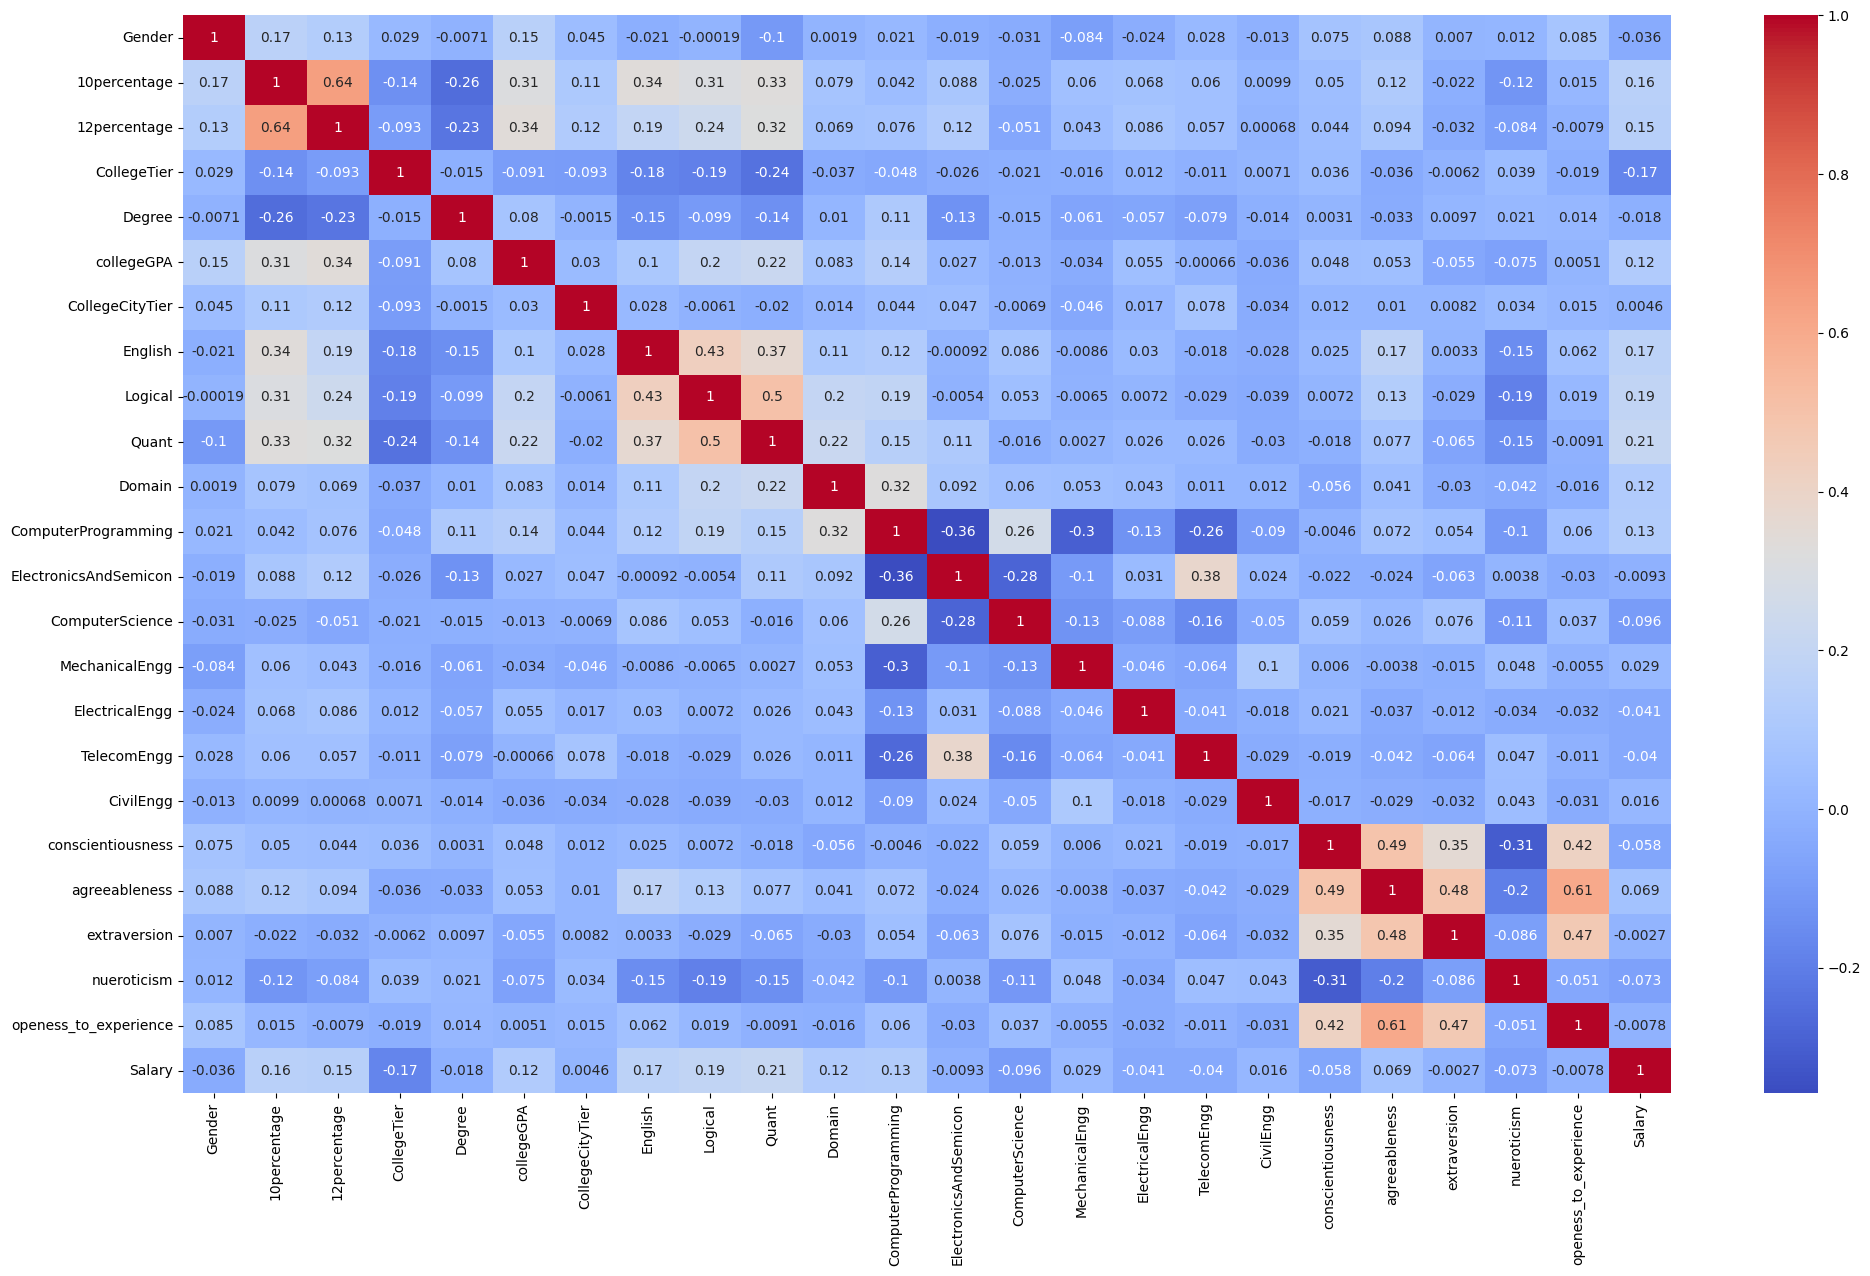

Các đặc trưng có tương quan cao với biến mục tiêu (Salary):
['Quant', 'Logical', 'English', '10percentage', '12percentage', 'ComputerProgramming', 'collegeGPA', 'Domain', 'CollegeTier']


In [203]:
# Trình bày các phần tìm ra mô hình

# Tính ma trận tương quan
correlation_matrix = train.corr()

# Vẽ biểu đồ tương quan heatmap
plt.figure(figsize=(24, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Chọn các đặc trưng có tương quan cao với biến mục tiêu
target_corr = correlation_matrix['Salary'].sort_values(ascending=False)
high_features = target_corr[(abs(target_corr) > 0.1) & (target_corr.index != 'Salary')].index.tolist()
print("Các đặc trưng có tương quan cao với biến mục tiêu (Salary):")
print(high_features)


## Thử nghiệm, so sánh các mô hình

In [204]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)

#lấy các đặc trưc có tương quan cao với Salary
features_1d = ['Quant', 'Logical', 'English', '10percentage', '12percentage', 
                     'ComputerProgramming', 'collegeGPA', 'Domain', 'CollegeTier']
X_train_unique_1d = X_train.drop_duplicates()
X_train_1d = X_train_unique_1d[features_1d]
X_test_1d=X_test[features_1d]
y_train_1d = y_train.loc[X_train_unique_1d.index]
lrs=[]
# Mô hình 1: Sử dụng các đặc trưng có độ tương quan cao so với salary
X_train_1d_1=X_train_1d
X_test_1d_1=X_test_1d
lr_1d_1 = LinearRegression()
lrs.append(('Sử dụng các đặc trưng có độ tương quan cao với salary', lr_1d_1, X_train_1d_1, X_test_1d_1))

# Mô hình 2: Sử dụng các đặc trưng biến đổi (bình phương)
X_train_1d_2= X_train_1d**2
X_test_1d_2=X_test_1d**2
lr_1d_2 = LinearRegression()
lrs.append(('Sử dụng các đặc trưng có độ tương quan cao với salary và biến đổi (bình phương)', lr_1d_2, X_train_1d_2, X_test_1d_2))

# Mô hình 3: Sử dụng các đặc trưng kết hợp 'Quant' và 'logical'
X_train_1d_3 = X_train_1d['Quant'] + X_train_1d['Logical']
X_train_1d_3 = X_train_1d_3.values.reshape(-1, 1)
X_test_1d_3=X_test_1d['Quant']+X_test_1d['Logical']
X_test_1d_3=X_test_1d_3.values.reshape(-1, 1)
lr_1d_3 = LinearRegression()
lrs.append(('Sử dụng các đặc trưng kết hợp (Quant) và (loical)', lr_1d_3, X_train_1d_3, X_test_1d_3))

# Tạo danh sách chứa các MAE tương ứng
mae_1d = []

# Sử dụng k-fold Cross Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Đánh giá tất cả các mô hình bằng cross_val_score
for lr_name, lr, train, test in lrs:
    mae_scores_model = -cross_val_score(lr, train, y_train_1d, cv=kf, scoring='neg_mean_absolute_error')
    avg_mae_model = mae_scores_model.mean()
    mae_1d.append((lr_name, avg_mae_model, train, test))

# Hiển thị kết quả cross-validation
display_MH(mae_1d)
# Tìm mô hình có MAE tốt nhất
my_best = min(mae_1d, key=lambda x: x[1])
print("Mô hình tốt nhất: ", my_best[0])


---------------------------------------------
STT          | Mô hình                                                      | MAE         
---------------------------------------------
1            | Sử dụng các đặc trưng có độ tương quan cao với salary        | 113147.568
---------------------------------------------
2            | Sử dụng các đặc trưng có độ tương quan cao với salary và biến đổi (bình phương) | 113350.030
---------------------------------------------
3            | Sử dụng các đặc trưng kết hợp (Quant) và (loical)            | 116679.675
---------------------------------------------
Mô hình tốt nhất:  Sử dụng các đặc trưng có độ tương quan cao với salary


In [205]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
X_train_mb=my_best[2]

lr_my_best=LinearRegression()
lr_my_best.fit(X_train_mb,y_train_1d)

# Truy xuất các trọng số của mô hình sau khi huấn luyện
display_Weight(lr_my_best, X_train_mb)

Weights:
               Feature        Weight
0                Quant    130.229185
1              Logical    127.518911
2              English    133.846284
3         10percentage    555.442391
4         12percentage   1056.192159
5  ComputerProgramming     69.645449
6           collegeGPA   1092.688515
7               Domain  26015.586709
8          CollegeTier -99626.911155
bias:  63725.571575201466


In [206]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
# Chuẩn bị dữ liệu cho tập kiểm tra
x_test_mb=my_best[3]
# Dự đoán mức lương trên tập kiểm tra với mô hình tốt nhất
y_pred_mb= lr_my_best.predict(x_test_mb)

# Tính MAE trên tập kiểm tra
mae_best_1b = MAE(y_test, y_pred_mb)
print("Mô hình tốt nhất: ", my_best[0])
print("MAE trên tập kiểm tra:", mae_best_1b)

Mô hình tốt nhất:  Sử dụng các đặc trưng có độ tương quan cao với salary
MAE trên tập kiểm tra: 104201.44201243388


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 63725.572 + (130.229 * Quant) + (127.519 * Logical) + (133.846 * English)\\ + (555.442 * 10percentage) + (1056.192 * 12percentage) + (69.645 * ComputerProgramming)\\ + (1092.689 * collegeGPA) + (26015.587 * Domain) + (-99626.911 * CollegeTier)  $$